In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download delicious.html from https://del.icio.us/export
# Parses a delicious.com bookmark file delicious.html current directory
update_data = True
if update_data:
    %run delicious2csv.py

In [3]:
# Read data from csv file
df = pd.read_csv('delicious.csv')

In [4]:
# Set index from add_date column in unix datetime
df['Date'] = pd.to_datetime(df.add_date, unit='s')
df.set_index('Date', inplace=True)

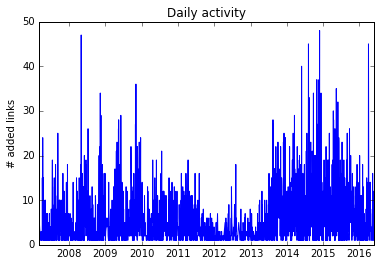

In [5]:
# Daily activity plot
ax = df.href.groupby(df.index.date).count().plot(title="Daily activity",style='-b')
ax.set_ylabel("# added links")
#df.title.groupby(pd.TimeGrouper("D")).count().plot(figsize=[20,10]) #Other way

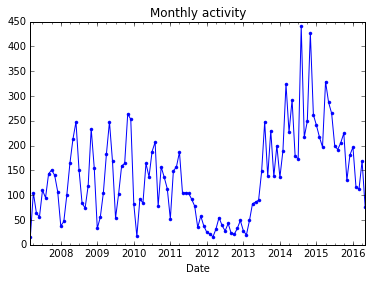

In [6]:
# Monthly activity plot
df.href.groupby(pd.TimeGrouper("M")).count().plot(title="Monthly activity", style='-b.')

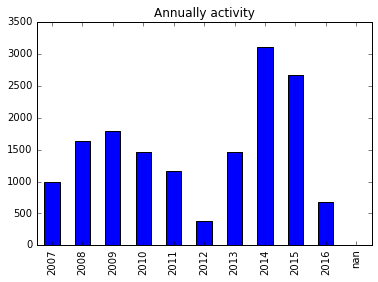

In [7]:
# Annually activity plot
# df.title.groupby(pd.TimeGrouper("A")).count().plot(title="Annually activity", kind='bar')
df.href.groupby(lambda x: str(x.year)).count().plot(kind='bar', title="Annually activity")

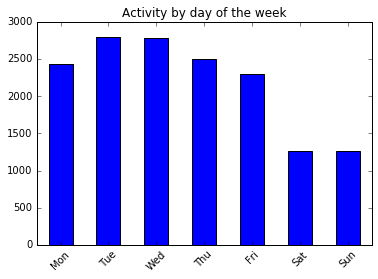

In [8]:
# Activity by day of the week plot
ax = df.href.groupby(df.index.dayofweek).count().plot(kind="bar", title="Activity by day of the week")
days = [pd.datetime(2000, 1, i).strftime('%a') for i in range(3,10)]
plt.xticks(range(7), days, rotation=45)
plt.show()

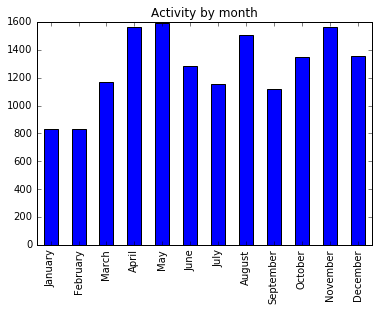

In [9]:
# Activity by month plot
df.href.groupby(df.index.month).count().plot(kind="bar", title="Activity by month")
months = [pd.datetime(2000, i, 1).strftime('%B') for i in range(1,13)]
plt.xticks(range(0,12), months)
plt.show()

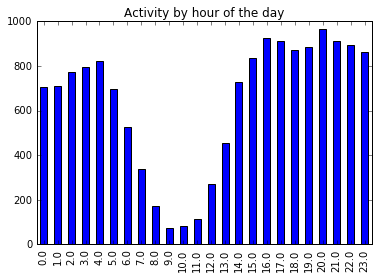

In [10]:
# Activity by hour of the day plot
df.href.groupby(df.index.hour).count().plot(kind="bar", title="Activity by hour of the day")

In [11]:
init = '2008-01-01' 
end = '2015-12-30'
# Maximum activity
print df.href.loc[init:end].groupby(pd.TimeGrouper("D")).count().max()
print df.href.loc[init:end].groupby(pd.TimeGrouper("M")).count().max()
print df.href.loc[init:end].groupby(pd.TimeGrouper("A")).count().max()

48
441
3117


In [12]:
# Mean activity
print df.href.loc[init:end].groupby(pd.TimeGrouper("D")).count().mean()
print df.href.loc[init:end].groupby(pd.TimeGrouper("M")).count().mean()
print df.href.loc[init:end].groupby(pd.TimeGrouper("A")).count().mean()

4.67591640973
142.177083333
1706.125


In [13]:
# Minimum activity
print df.href.loc[init:end].groupby(pd.TimeGrouper("D")).count().min()
print df.href.loc[init:end].groupby(pd.TimeGrouper("M")).count().min()
print df.href.loc[init:end].groupby(pd.TimeGrouper("A")).count().min()

0
16
386


In [14]:
df.tags.head()

Date
2016-05-24 03:09:07                       excel,import,csv
2016-05-21 07:49:37           pyxll,enthought,python,excel
2016-05-21 00:09:21    translation,functions,excel,spanish
2016-05-20 21:59:08                        currency,format
2016-05-20 02:13:49                             mortalidad
Name: tags, dtype: object

In [15]:
from collections import Counter
cnt = Counter()

for k,tags in df.tags.iteritems():
    for tag in str(tags).split(','):
        cnt[tag.decode('utf8')] += 1

In [16]:
for k,v in cnt.most_common(10):
    print k, v

python 1455
chile 854
opensource 580
programming 450
data 349
science 349
statistics 304
database 269
ubuntu 266
gis 206


In [17]:
df1 = pd.DataFrame.from_dict(cnt, orient='index')
df1.rename(columns={'index':'tag', 0:'count'}, inplace=True)
df1.sort_values('count', ascending=False, inplace=True)

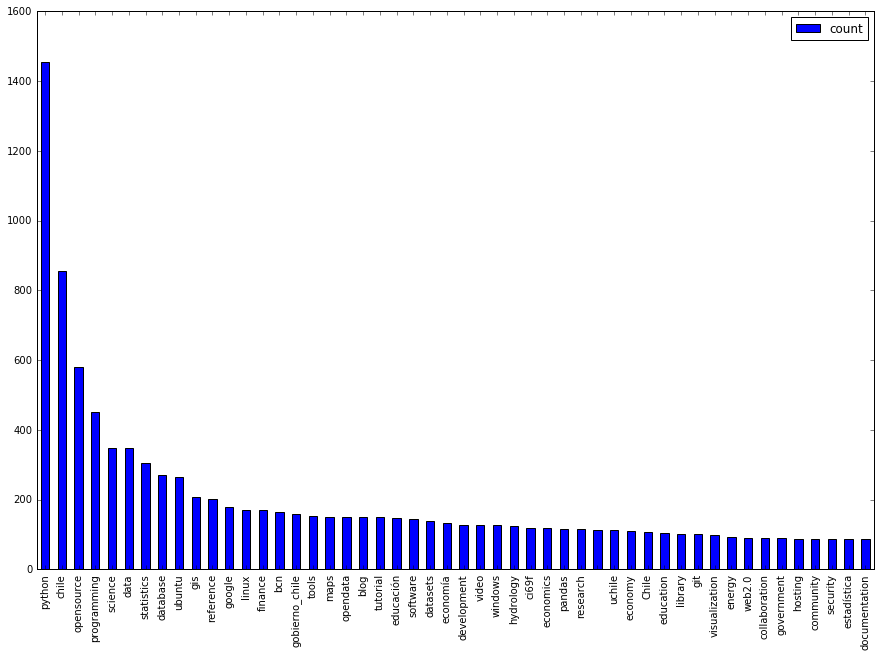

In [18]:
df1[:50].plot(kind='bar', figsize=[15,10])